In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("breast-cancer-wisconsin.csv")

In [3]:
df.head()

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4


In [4]:
len(df.columns)

11

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698 entries, 0 to 697
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   id                           698 non-null    int64 
 1   Clump Thickness              698 non-null    int64 
 2   Uniformity of Cell Size      698 non-null    int64 
 3   Uniformity of Cell Shape     698 non-null    int64 
 4   Marginal Adhesion            698 non-null    int64 
 5   Single Epithelial Cell Size  698 non-null    int64 
 6   Bare Nuclei                  698 non-null    object
 7   Bland Chromatin              698 non-null    int64 
 8   Normal Nucleoli              698 non-null    int64 
 9   Mitoses                      698 non-null    int64 
 10  Class                        698 non-null    int64 
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


In [5]:
df.isin(["?"]).sum()

id                              0
Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

In [6]:
df=df[df['Bare Nuclei'].isin(['0','1','2','3','4','5','6','7','8','9','10'])]

In [7]:
df

,id,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [8]:
df=df.drop(['id'], axis=1)

In [9]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,4


In [10]:
df['Class']=df['Class'].replace(to_replace=4, value=1)#these represent malignant tumors

In [11]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,2
1,3,1,1,1,2,2,3,1,1,2
2,6,8,8,1,3,4,3,7,1,2
3,4,1,1,3,2,1,3,1,1,2
4,8,10,10,8,7,10,9,7,1,1


In [12]:
df['Class']=df['Class'].replace(to_replace=2, value=0)#these are benign tumors

In [13]:
df.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,4,4,5,7,10,3,2,1,0
1,3,1,1,1,2,2,3,1,1,0
2,6,8,8,1,3,4,3,7,1,0
3,4,1,1,3,2,1,3,1,1,0
4,8,10,10,8,7,10,9,7,1,1


In [14]:
len(df)

682

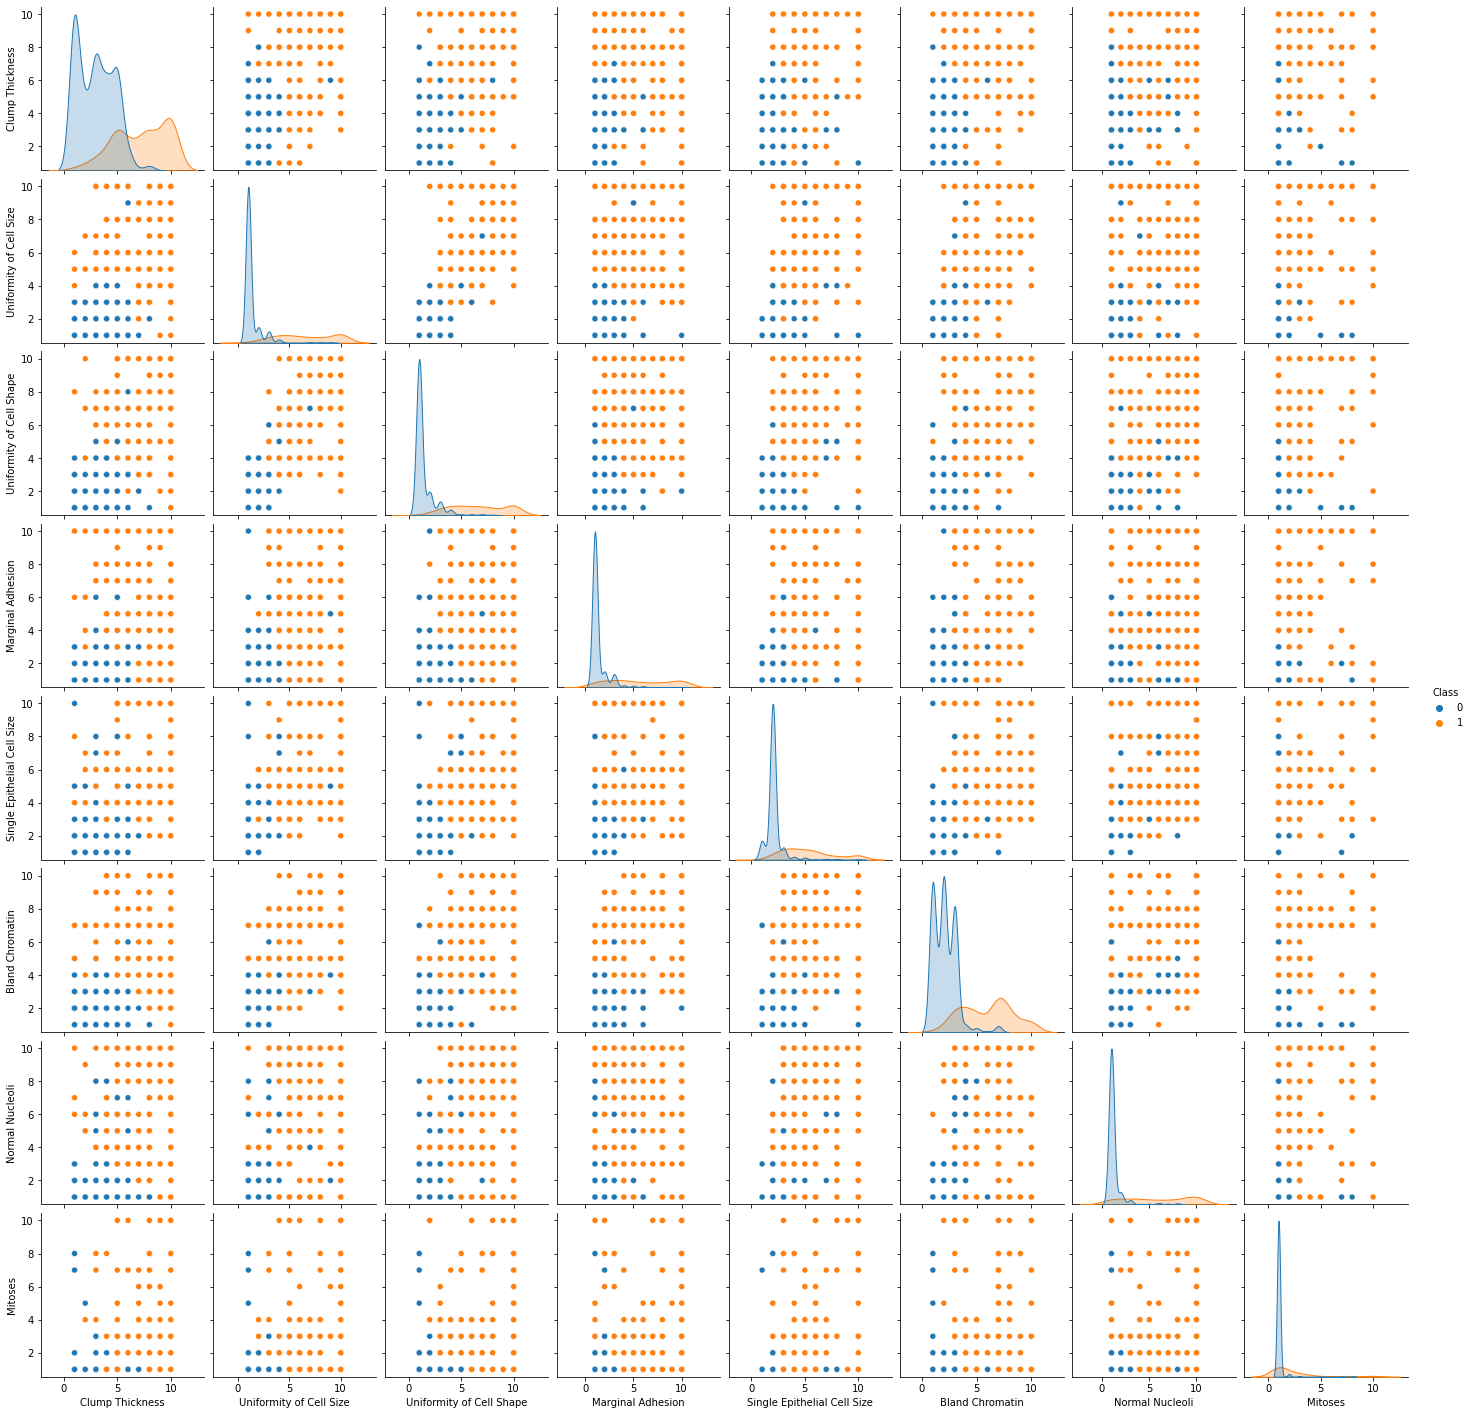

In [17]:
sns.pairplot(df, hue='Class')

In [15]:
X=df.drop('Class', axis=1)
y=df['Class']

# Splitting the data: train, validate and test...

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_other, y_train, y_other = train_test_split(X, y, test_size=0.3)
X_eval, X_test, y_eval, y_test = train_test_split(X_other, y_other, test_size=0.5)

In [17]:
from sklearn.svm import SVC

In [18]:
model = SVC(kernel='linear', C=1000)
model.fit(X_train, y_train) 

SVC(C=1000, kernel='linear')

In [19]:
from sklearn.model_selection import GridSearchCV

In [20]:
svm = SVC()
param_grid = {'C':[0.01,0.1,1,2,5],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2, 5],
                         'kernel': ['linear', 'rbf']})

In [21]:
grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

# Here i use the parameters suggested by gridsearch, a linear kernel and small C

In [22]:
model = SVC(kernel='linear', C=0.01)
model.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [23]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,plot_confusion_matrix

In [24]:
y_pred=model.predict(X_eval)

In [25]:
accuracy_score(y_eval, y_pred)

0.9411764705882353

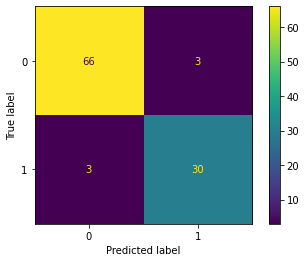

In [26]:
plot_confusion_matrix(model, X_eval, y_eval)

In [27]:
print(classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        69
           1       0.91      0.91      0.91        33

    accuracy                           0.94       102
   macro avg       0.93      0.93      0.93       102
weighted avg       0.94      0.94      0.94       102



In [28]:
model = SVC(kernel='rbf', C=500)
model.fit(X_train, y_train) #this kernel should be more powerful than the "linear" one

SVC(C=500)

In [29]:
y_pred=model.predict(X_eval)

In [30]:
accuracy_score(y_eval, y_pred)

0.9117647058823529

# The first params are better indeed, but the model still predicts pretty well

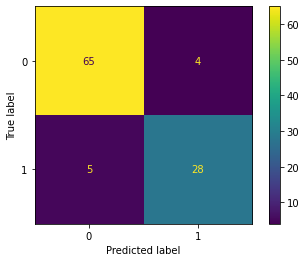

In [31]:
plot_confusion_matrix(model, X_eval, y_eval)

# Reporting the test results...

In [32]:
model = SVC(kernel='linear', C=0.01)
model.fit(X_train, y_train)

SVC(C=0.01, kernel='linear')

In [33]:
model.fit(X_eval, y_eval)

SVC(C=0.01, kernel='linear')

In [34]:
y_pred=model.predict(X_test)

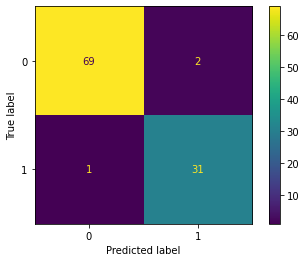

In [35]:
plot_confusion_matrix(model, X_test, y_test)

In [36]:
print(classification_report(y_test, y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        71
           1       1.00      1.00      1.00        32

    accuracy                           1.00       103
   macro avg       1.00      1.00      1.00       103
weighted avg       1.00      1.00      1.00       103



# Trying to visualize the data...

In [148]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [149]:
pca = PCA(n_components=2) #first i have tried to reduce the feature dimensionality to 2

In [150]:
principal_components = pca.fit_transform(X)

In [151]:
principalDf=pd.DataFrame(data=principal_components, columns=['pc1','pc2'])

In [153]:
finalDf=pd.concat([principalDf, df[['Class']]], axis=1)

In [163]:
finalDf.dropna()

,pc1,pc2,Class
0,4.812431,-4.739606,0.0
1,-4.639417,-0.609485,0.0
2,5.089708,3.386527,0.0
3,-4.122640,-0.098846,0.0
4,15.002287,-0.490187,1.0
...,...,...,...
677,-4.974090,-0.426219,0.0
678,-5.963356,0.227699,0.0
679,10.253633,7.272519,1.0
680,6.394630,2.499893,1.0


<AxesSubplot:xlabel='pc1', ylabel='pc2'>

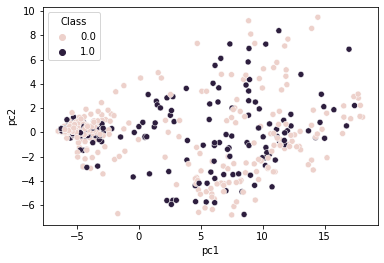

In [166]:
sns.scatterplot(x='pc1',y='pc2',data=finalDf, hue='Class') #it didn't retain enough variance to be able to see a linear classification 

In [167]:
from mpl_toolkits.mplot3d import Axes3D

In [180]:
scaled_X = scaler.fit_transform(df)
pca = PCA(n_components=3)
principal_components = pca.fit_transform(scaled_X)
principalDf=pd.DataFrame(data=principal_components, columns=['pc1','pc2','pc3'])
finalDf=pd.concat([principalDf, df[['Class']]], axis=1)
finalDf.dropna()

,pc1,pc2,pc3,Class
0,1.089797,-0.368099,-0.374173,0.0
1,-1.750100,-0.068558,-0.053828,0.0
2,1.121633,-0.305414,0.321313,0.0
3,-1.519853,-0.062070,-0.049072,0.0
4,5.173002,-1.363035,-0.654224,1.0
...,...,...,...,...
677,-1.873923,0.176540,0.091099,0.0
678,-2.202807,0.210775,-0.155067,0.0
679,4.013410,-0.020234,-0.854281,1.0
680,2.575409,-1.078978,-1.085136,1.0


In [183]:
%matplotlib notebook

<IPython.core.display.Javascript object>


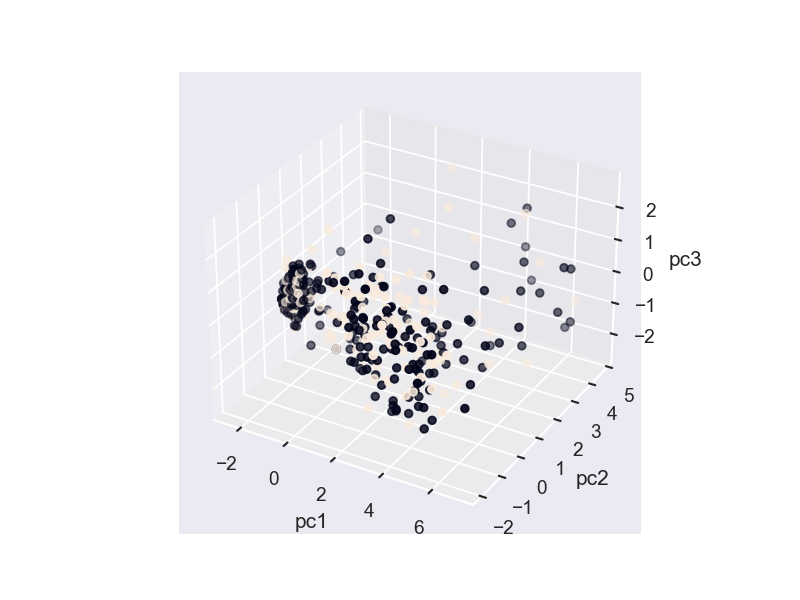

In [194]:
sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = finalDf['pc1']
y = finalDf['pc2']
z = finalDf['pc3']

ax.set_xlabel("pc1")
ax.set_ylabel("pc2")
ax.set_zlabel("pc3")

ax.scatter(x, y, z, c=finalDf['Class'])

plt.show()
#3D didn't succeed to reveal a cleam decision boundary

In [187]:
df2=df[['Clump Thickness','Single Epithelial Cell Size','Class']]

<IPython.core.display.Javascript object>


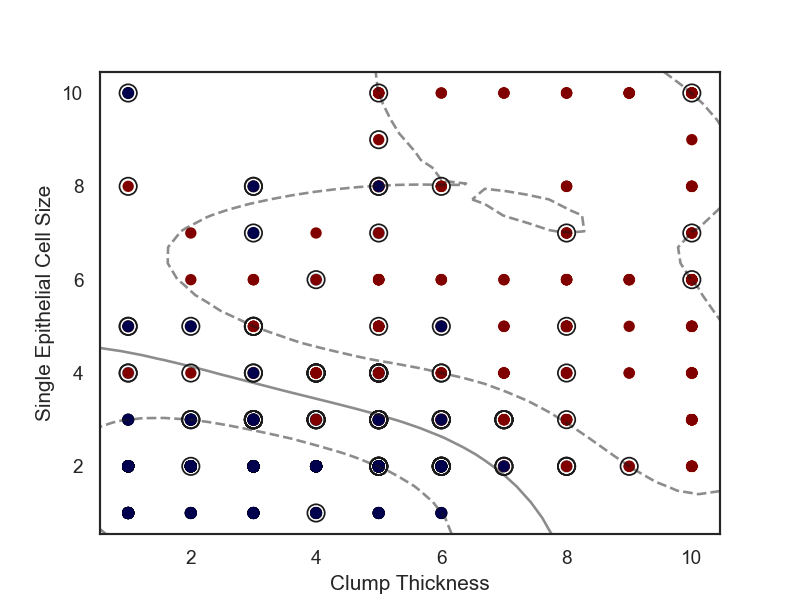

In [215]:
sns.set(style = "white")

fig = plt.figure()
ax = fig.add_subplot()

x = df2['Clump Thickness']
y = df2['Single Epithelial Cell Size']


ax.set_xlabel("Clump Thickness")
ax.set_ylabel("Single Epithelial Cell Size")

ax.scatter(x, y, c=df2['Class'])

plt.show()

In [216]:
yy=df2["Class"]
xx=df2.drop("Class", axis=1)
svm = SVC()
param_grid = {'C':[0.01,0.1,1,2,5],'kernel':['linear','rbf']}
grid = GridSearchCV(svm,param_grid)
grid.fit(xx,yy)


GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1, 2, 5],
                         'kernel': ['linear', 'rbf']})

In [217]:
grid.best_params_

{'C': 1, 'kernel': 'rbf'}

In [218]:
model = SVC(kernel='rbf', C=1)
model.fit( xx, yy)

SVC(C=1)

In [219]:
from svm_margin_plot import plot_svm_boundary

In [220]:
plot_svm_boundary(model,xx,yy)